# Basic Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/IPL2016.csv')

In [4]:
data = data.drop(columns=['Unnamed: 0'])

In [5]:
data

,overall_sr,won
0,168.817204,1
1,165.432099,0
2,121.568627,0
3,149.541284,1
4,151.898734,0
5,124.489796,0
6,112.000000,0
7,178.688525,1
8,150.000000,1
9,91.176471,0


In [6]:
X = np.array(data['overall_sr'])
y = np.array(data['won'])

In [7]:
X

array([168.8172043 , 165.43209877, 121.56862745, 149.5412844 ,
       151.89873418, 124.48979592, 112.        , 178.68852459,
       150.        ,  91.17647059, 222.42990654, 163.41463415,
       217.30769231, 113.20754717, 161.2244898 , 143.90243902])

# Plotting Stirke Rate vs Win / Loss

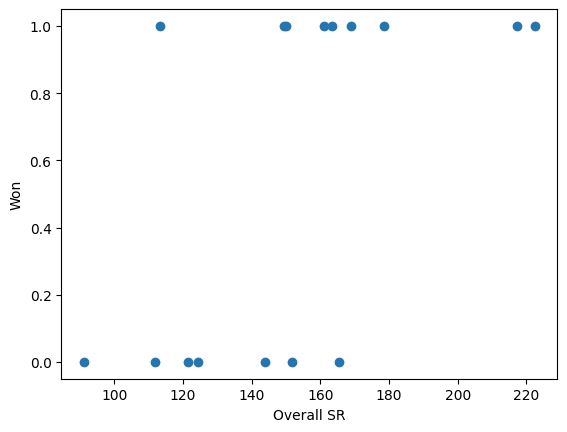

In [11]:
plt.scatter(X, y)
plt.xlabel('Overall SR')
plt.ylabel('Won')
plt.show()

## Sigmoid Function

In [12]:
def sigmoid(x):
  x = np.array(x, dtype=np.float128)
  return 1 / (1 + np.exp(-x))

# Logistic Regression

In [359]:
class LogisticRegression:
  def __init__(self, X, y, lr=0.01, epochs=20000):
    self.X_original = X
    self.X = (X - np.min(X))/(np.max(X) - np.min(X))
    self.y = y
    self.weights = None
    self.bias = None
    self.lr = lr
    self.epochs = epochs
    self.predictions = []

  def fit(self):
    n_samples = self.X.shape[0]  # 16
    self.X = self.X.reshape((n_samples, 1)) # (16, 1)
    self.y = self.y.reshape((n_samples, 1)) # (16, 1)
    self.weights = np.zeros((1,1))
    self.bias = 0

    for _ in range(self.epochs):  # Looping through each epoch
      # Calculate z = xw + b
      z = np.dot(self.X, self.weights) + self.bias # (16, 1) (1, 1) -> (16, 1)
      y_pred = sigmoid(z) # (16, 1)

      # Setting up the gradients
      grad_w = (1/n_samples)*np.dot(self.X.T, y_pred - self.y)  # (1, 16) (16, 1) -> (1, 1)
      grad_b = (1/n_samples)*np.sum(y_pred - self.y) # 1

      # Now we use gradient descent (change the weights and biases)
      self.weights = self.weights - self.lr * grad_w
      self.bias = self.bias - self.lr * grad_b

  def predict(self, X, display = False):
    size = X.shape[0]
    X = X.reshape((size, 1))
    # Normalising the data
    X_normalised = (X - np.min(self.X_original))/(np.max(self.X_original) - np.min(self.X_original))
    z = np.dot(X_normalised, self.weights) + self.bias
    y_pred = sigmoid(z)

    # Plotting the data points
    if display:
      x_mid_normalised = (-self.bias) / self.weights[0]
      x_mid = (x_mid_normalised * (np.max(self.X_original) - np.min(self.X_original)) + np.min(self.X_original))[0]
      print("50% probability of winning at strike rate of: ", x_mid)
      plt.scatter(X, y_pred)
      plt.yticks(np.arange(0, 1.1, step=0.1))
      plt.xlabel('Overall SR')
      plt.ylabel('Probability of Winning')
      plt.axvline(x=x_mid, color="black")
      plt.axhline(y = 0.5, color="black")
      plt.show()
    return y_pred

# Final displaying the mdoel

In [367]:
model = LogisticRegression(X, y)

In [368]:
model.fit()

In [369]:
model.weights, model.bias

(array([[4.91085233]], dtype=float128), -1.8917150899823967472)

50% probability of winning at strike rate of:  141.73675802577648619


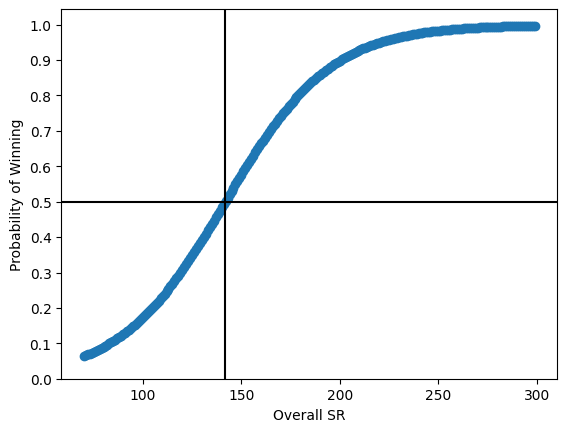

array([[0.0639221 ],
       [0.06619773],
       [0.06854844],
       [0.07097629],
       [0.07348333],
       [0.07607169],
       [0.07874346],
       [0.08150079],
       [0.08434584],
       [0.08728077],
       [0.09030774],
       [0.09342895],
       [0.09664658],
       [0.09996279],
       [0.10337978],
       [0.10689969],
       [0.11052468],
       [0.11425686],
       [0.11809834],
       [0.12205118],
       [0.1261174 ],
       [0.13029899],
       [0.13459787],
       [0.13901591],
       [0.14355491],
       [0.1482166 ],
       [0.15300262],
       [0.15791454],
       [0.16295381],
       [0.16812178],
       [0.1734197 ],
       [0.17884867],
       [0.18440969],
       [0.19010358],
       [0.19593104],
       [0.20189262],
       [0.20798866],
       [0.21421936],
       [0.22058473],
       [0.22708458],
       [0.23371853],
       [0.24048598],
       [0.24738612],
       [0.25441793],
       [0.26158014],
       [0.26887127],
       [0.27628959],
       [0.283

In [370]:
model.predict(np.arange(70, 300), display = True)

In [371]:
x = float(input("Enter the overall strike rate: "))
x = np.array([x])
print("Probability of winning: ", model.predict(x)[0][0] * 100, "%")

Enter the overall strike rate: 157.34
Probability of winning:  64.19403734008690568 %
